# Noises visualizations

In [1]:
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from scripts.noises_v2 import *
from scripts.visualizations import *
import torch
import librosa

In [2]:
sample = librosa.load('../data/Actor_01/03-01-01-01-01-01-01.wav', sr = 22050)[0]
sample_torch = torch.Tensor(sample).cuda()

### Single signal

/home/mweuro/sem_2/VocoderBenchmarking/examples/../scripts/visualizations.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


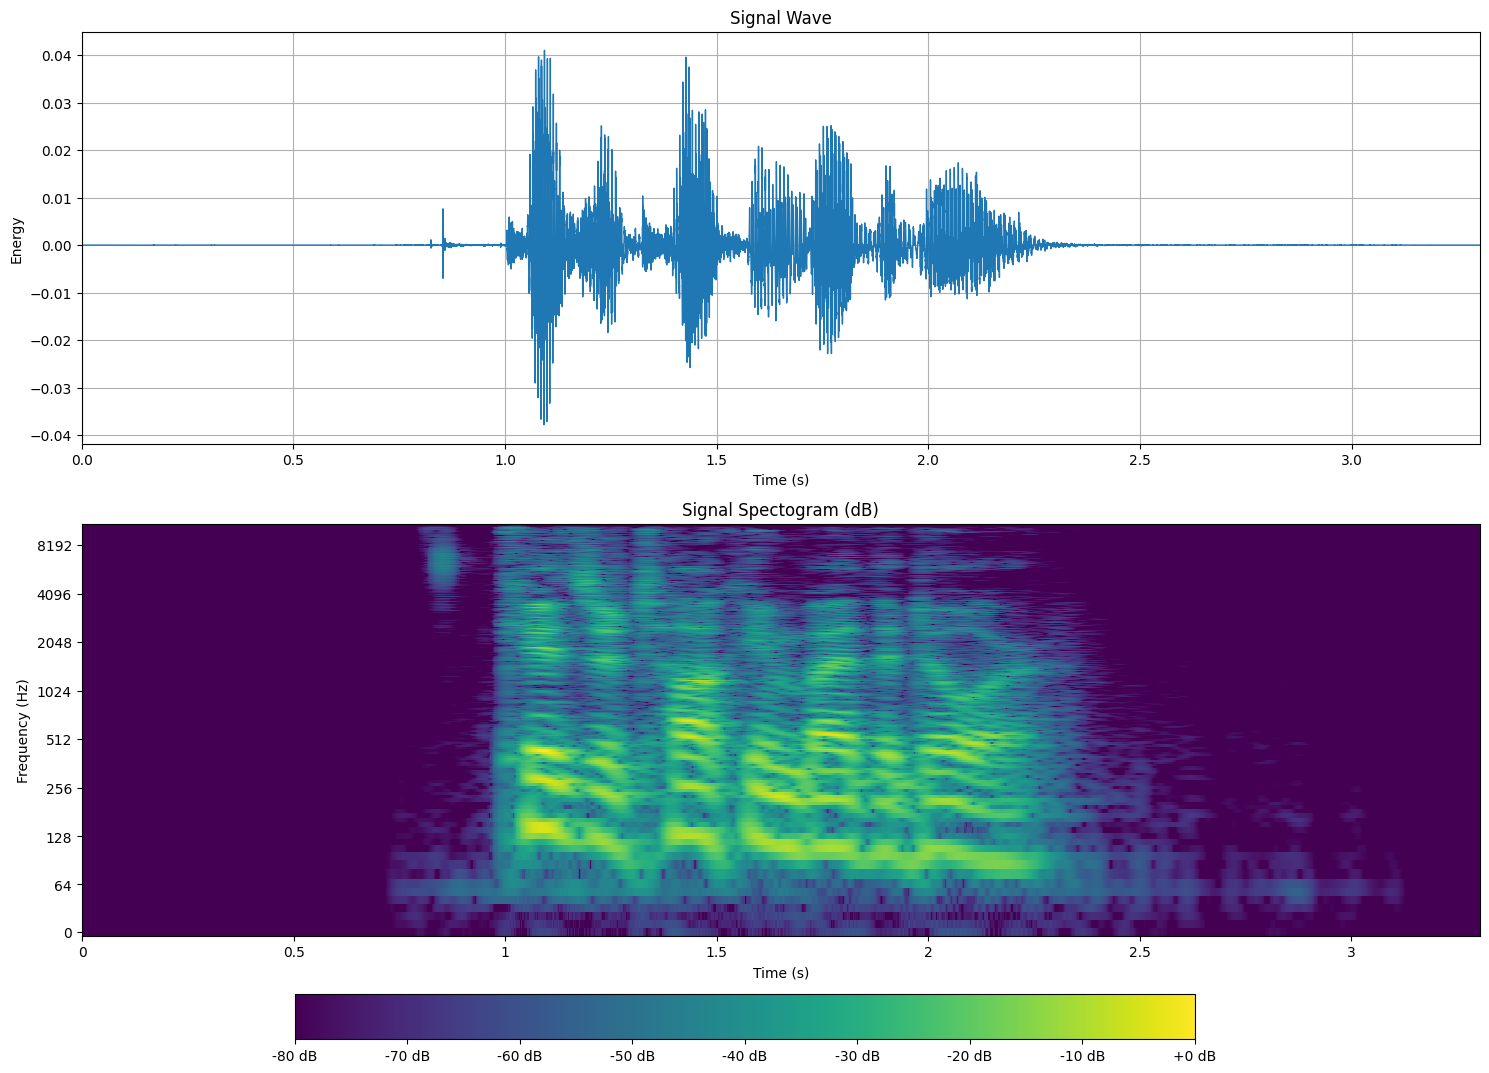

In [3]:
plot_wave_and_spec(sample_torch, sr = 22050)

### Noised waves comparison

In [4]:
c = 0.0005
signals_colors = [sample]
signals_others = [sample]

noise_colors = [WhiteNoise, BlueNoise, VioletNoise, PinkNoise, BrownianNoise]
titles_colors = ['Raw signal', 
          'White noised signal', 
          'Blue noised signal', 
          'Violet noised signal', 
          'Pink noised signal', 
          'Brownian noised signal']

for color in noise_colors:
    noise = color(c)
    signals_colors.append(noise(sample))




others_noises = [ImpulseNoise, FrequencyNoise, ClippingNoise]
titles_others = ['Raw signal',
                 'Impulse noised signal',
                 'Frequency noised signal',
                 'Clipping noised signal']
others_params = [{'low_threshold': 0.03, 'high_threshold': 0.8},
                 {'min_freq': 4000, 'max_freq': 6000},
                 {'threshold': 0.1}]

for (noise_func, params) in zip(others_noises, others_params):
    noise = noise_func(**params)
    signals_others.append(noise(sample))

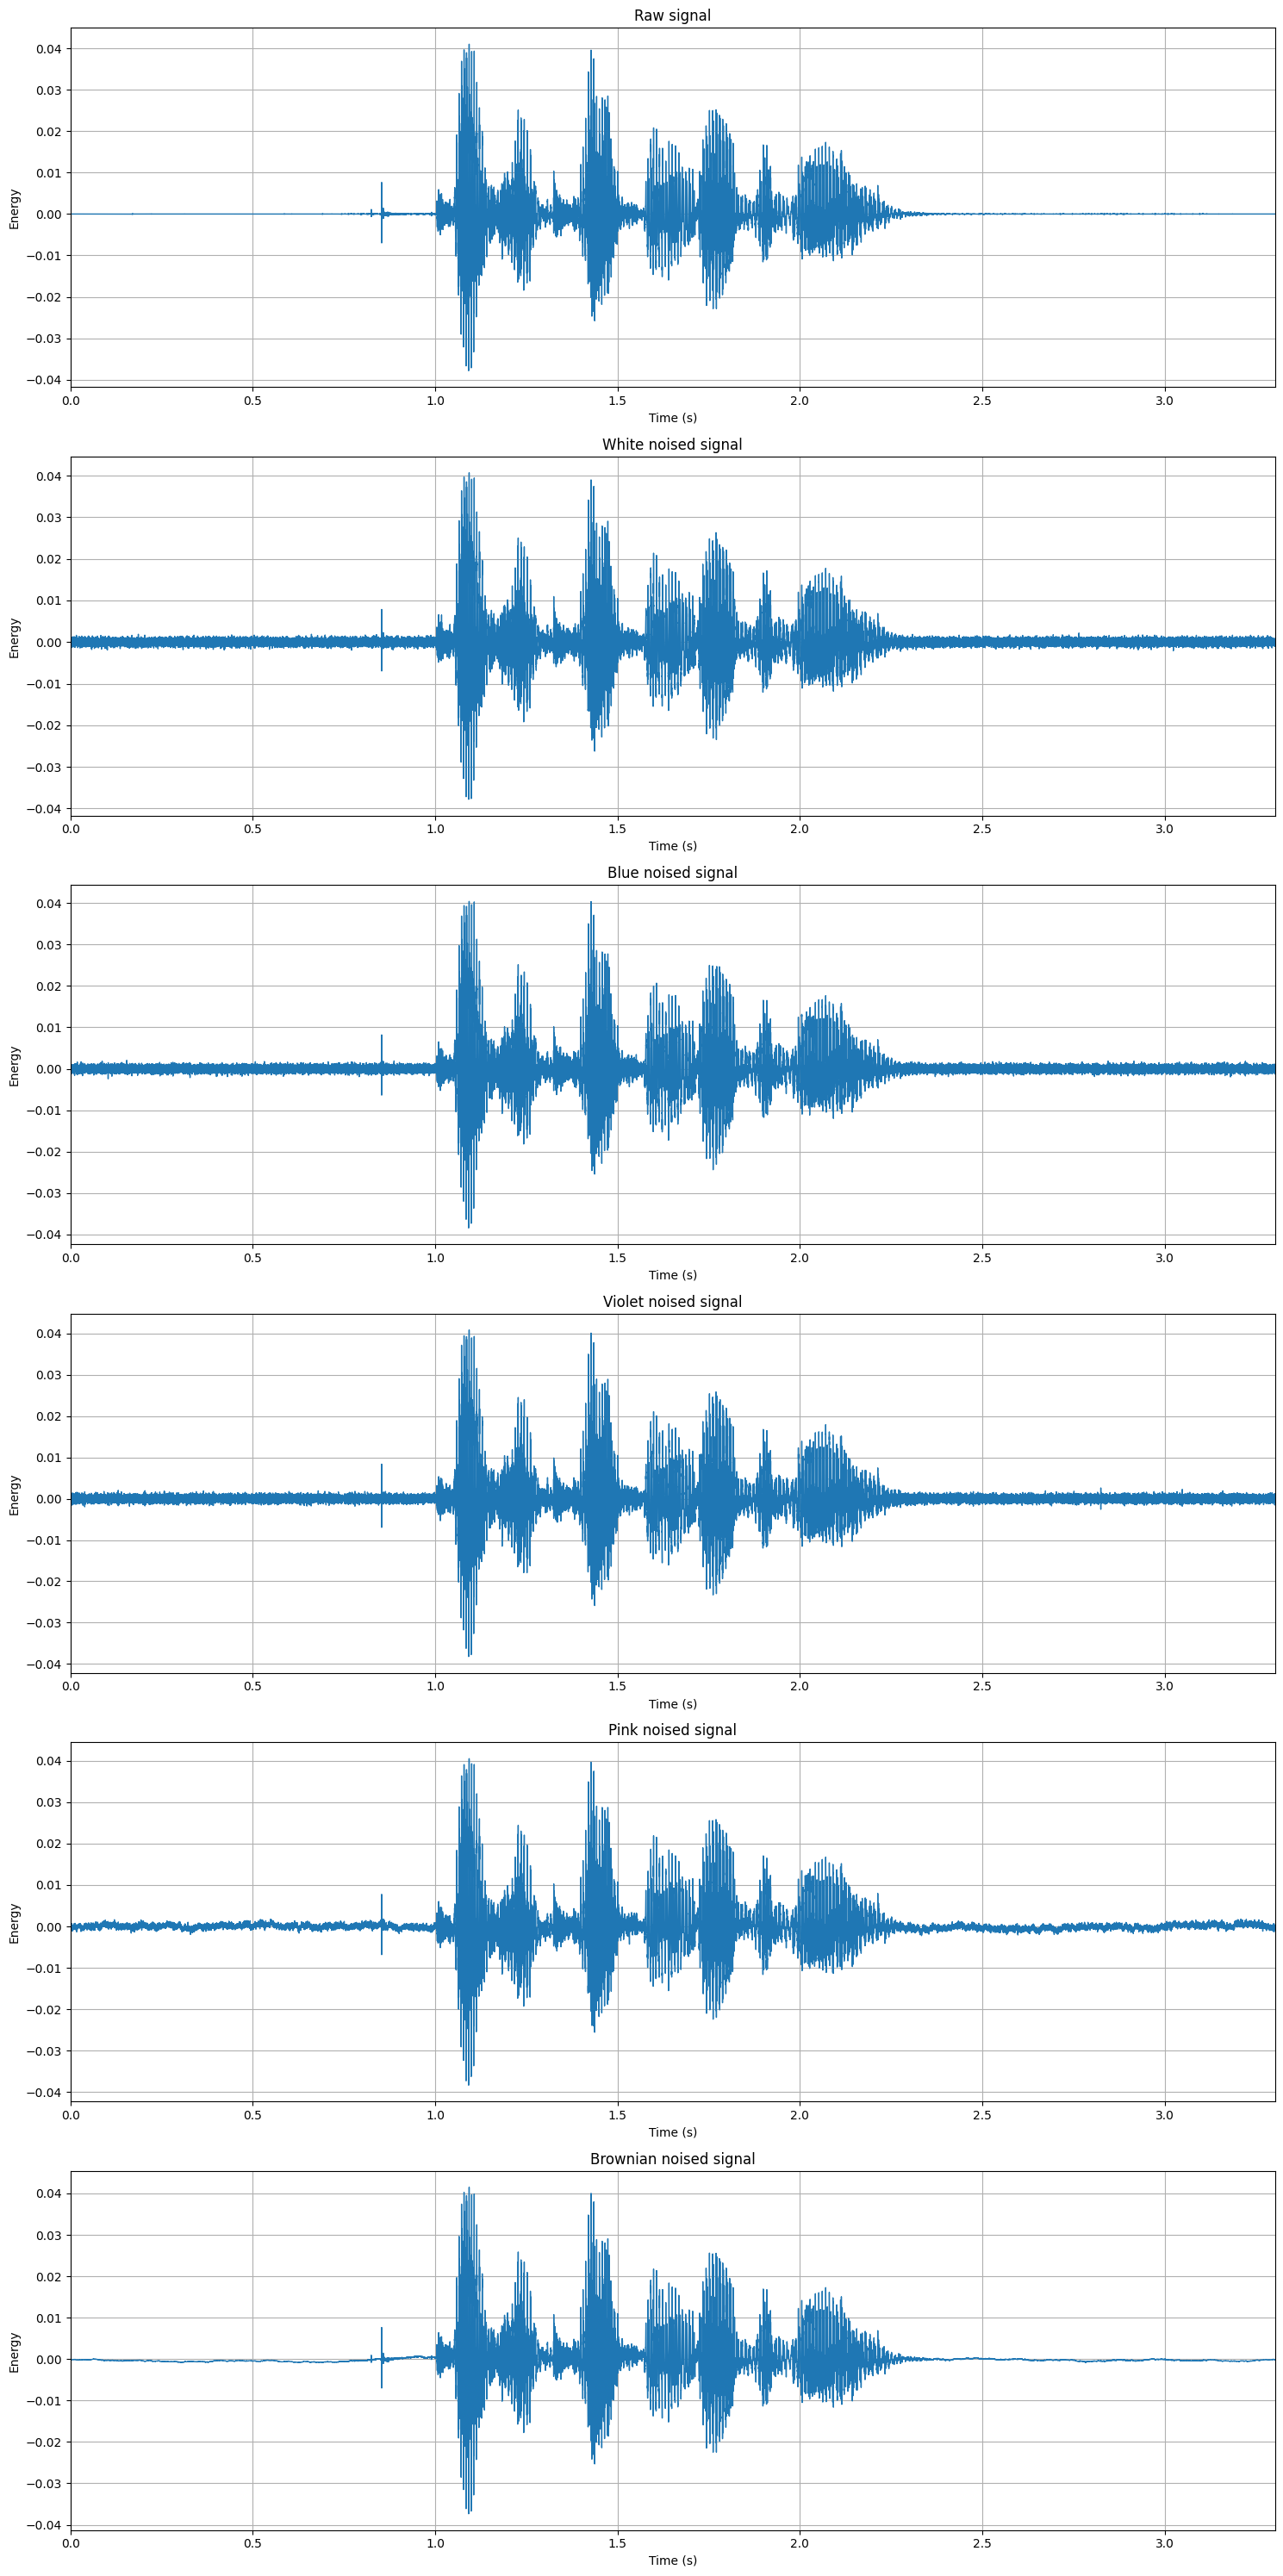

In [5]:
plot_multiple_waves(signals_colors, titles = titles_colors)

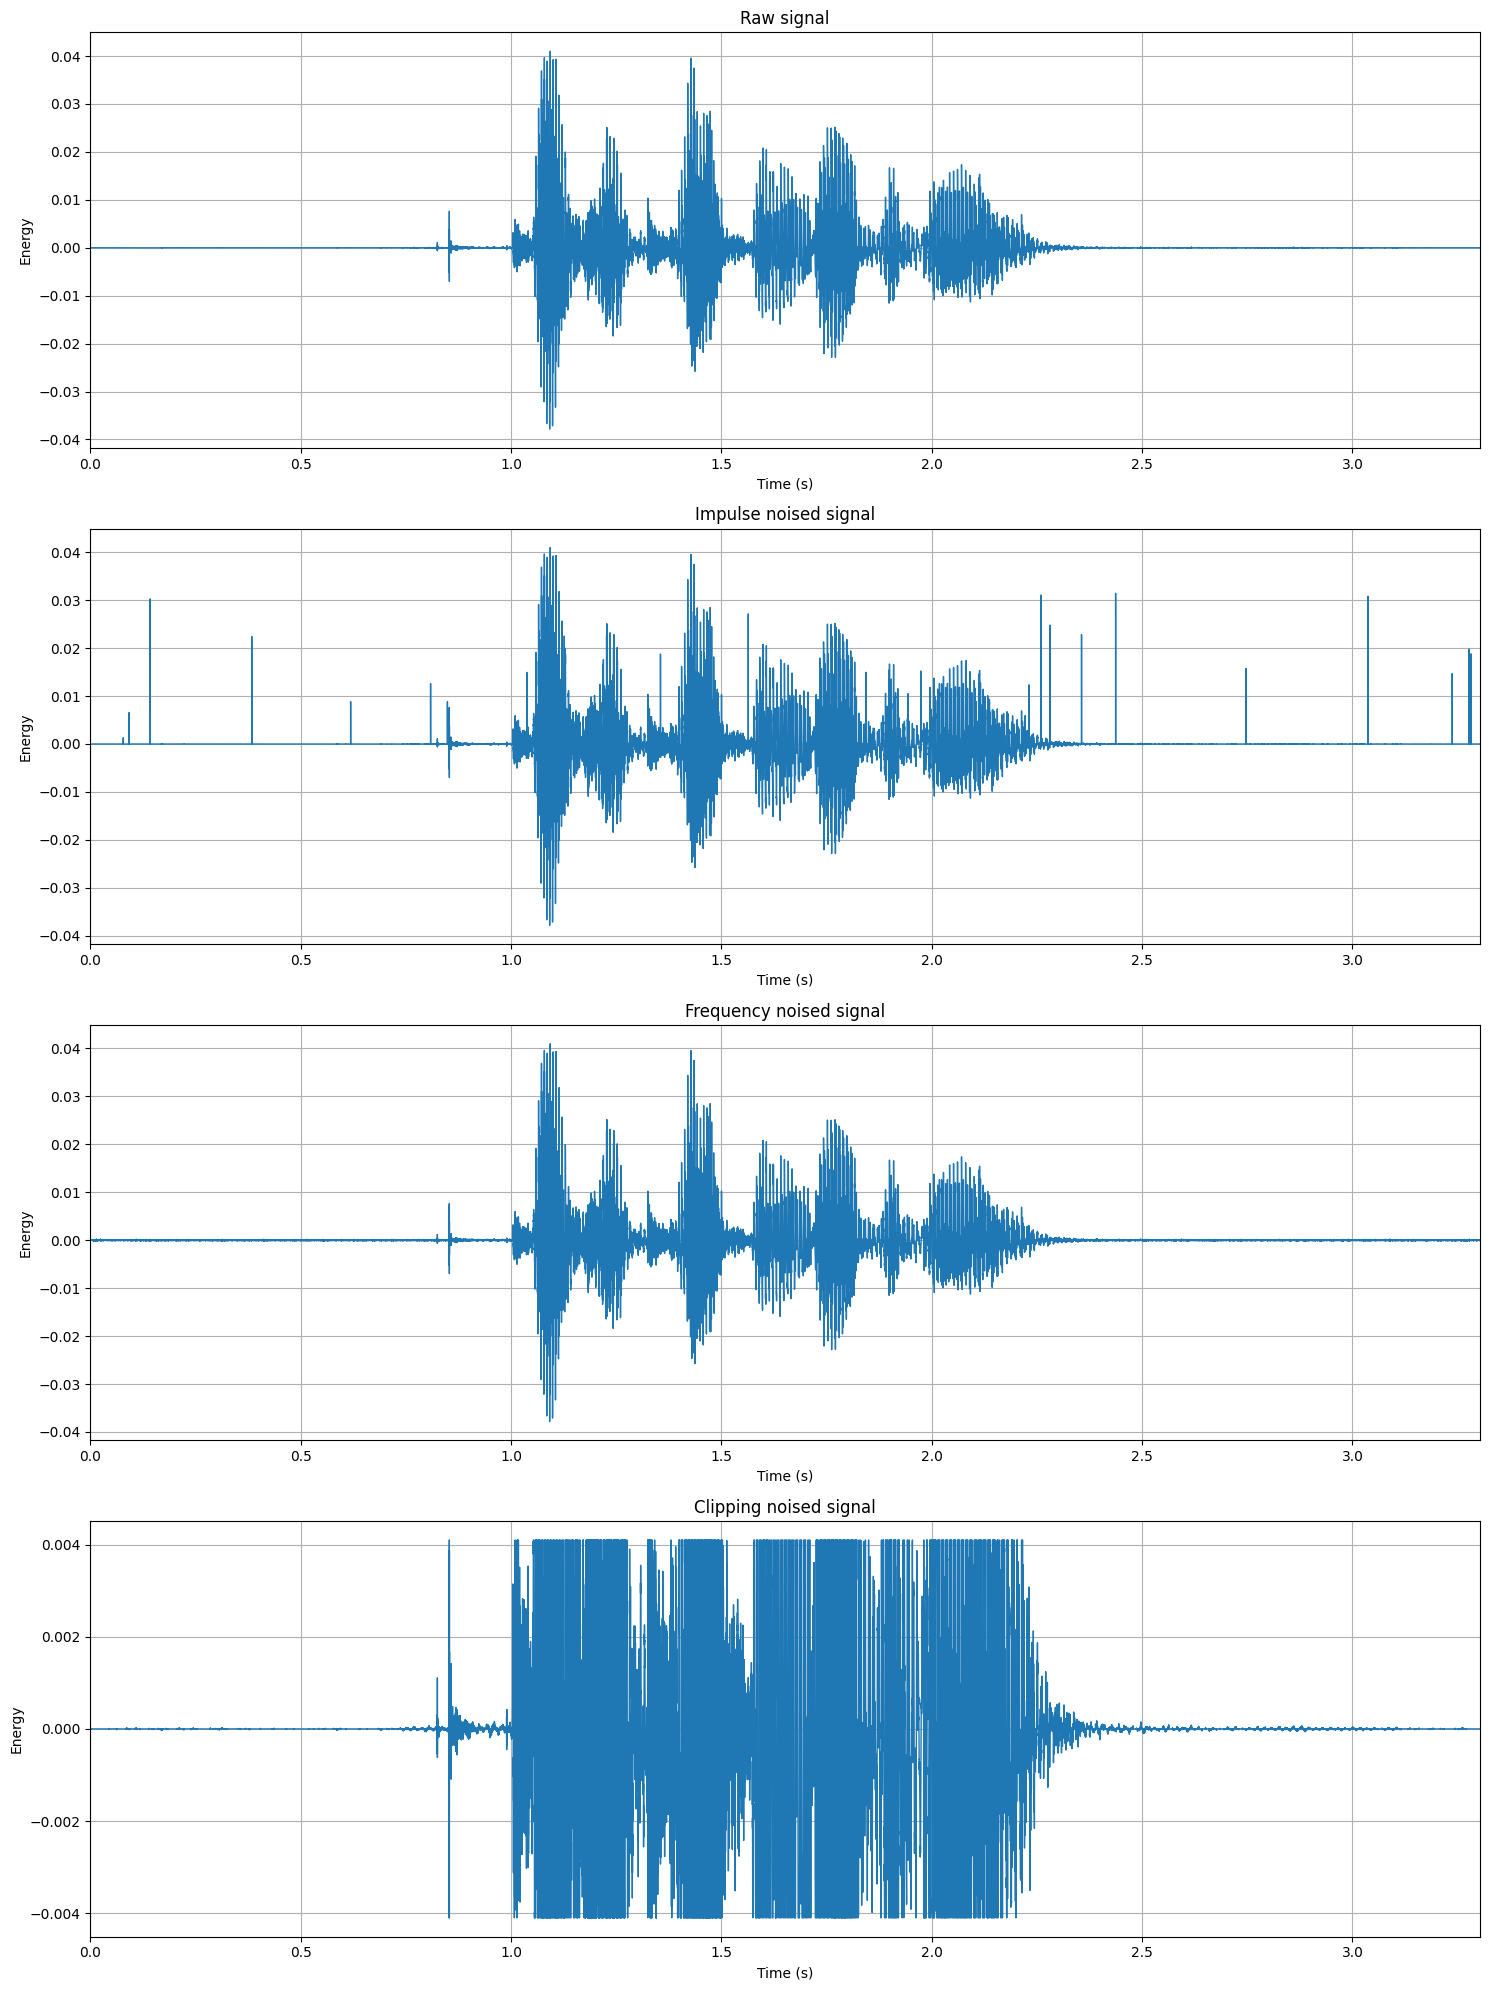

In [6]:
plot_multiple_waves(signals_others, titles = titles_others)

### Noised spectograms comparison

/home/mweuro/sem_2/VocoderBenchmarking/examples/../scripts/visualizations.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


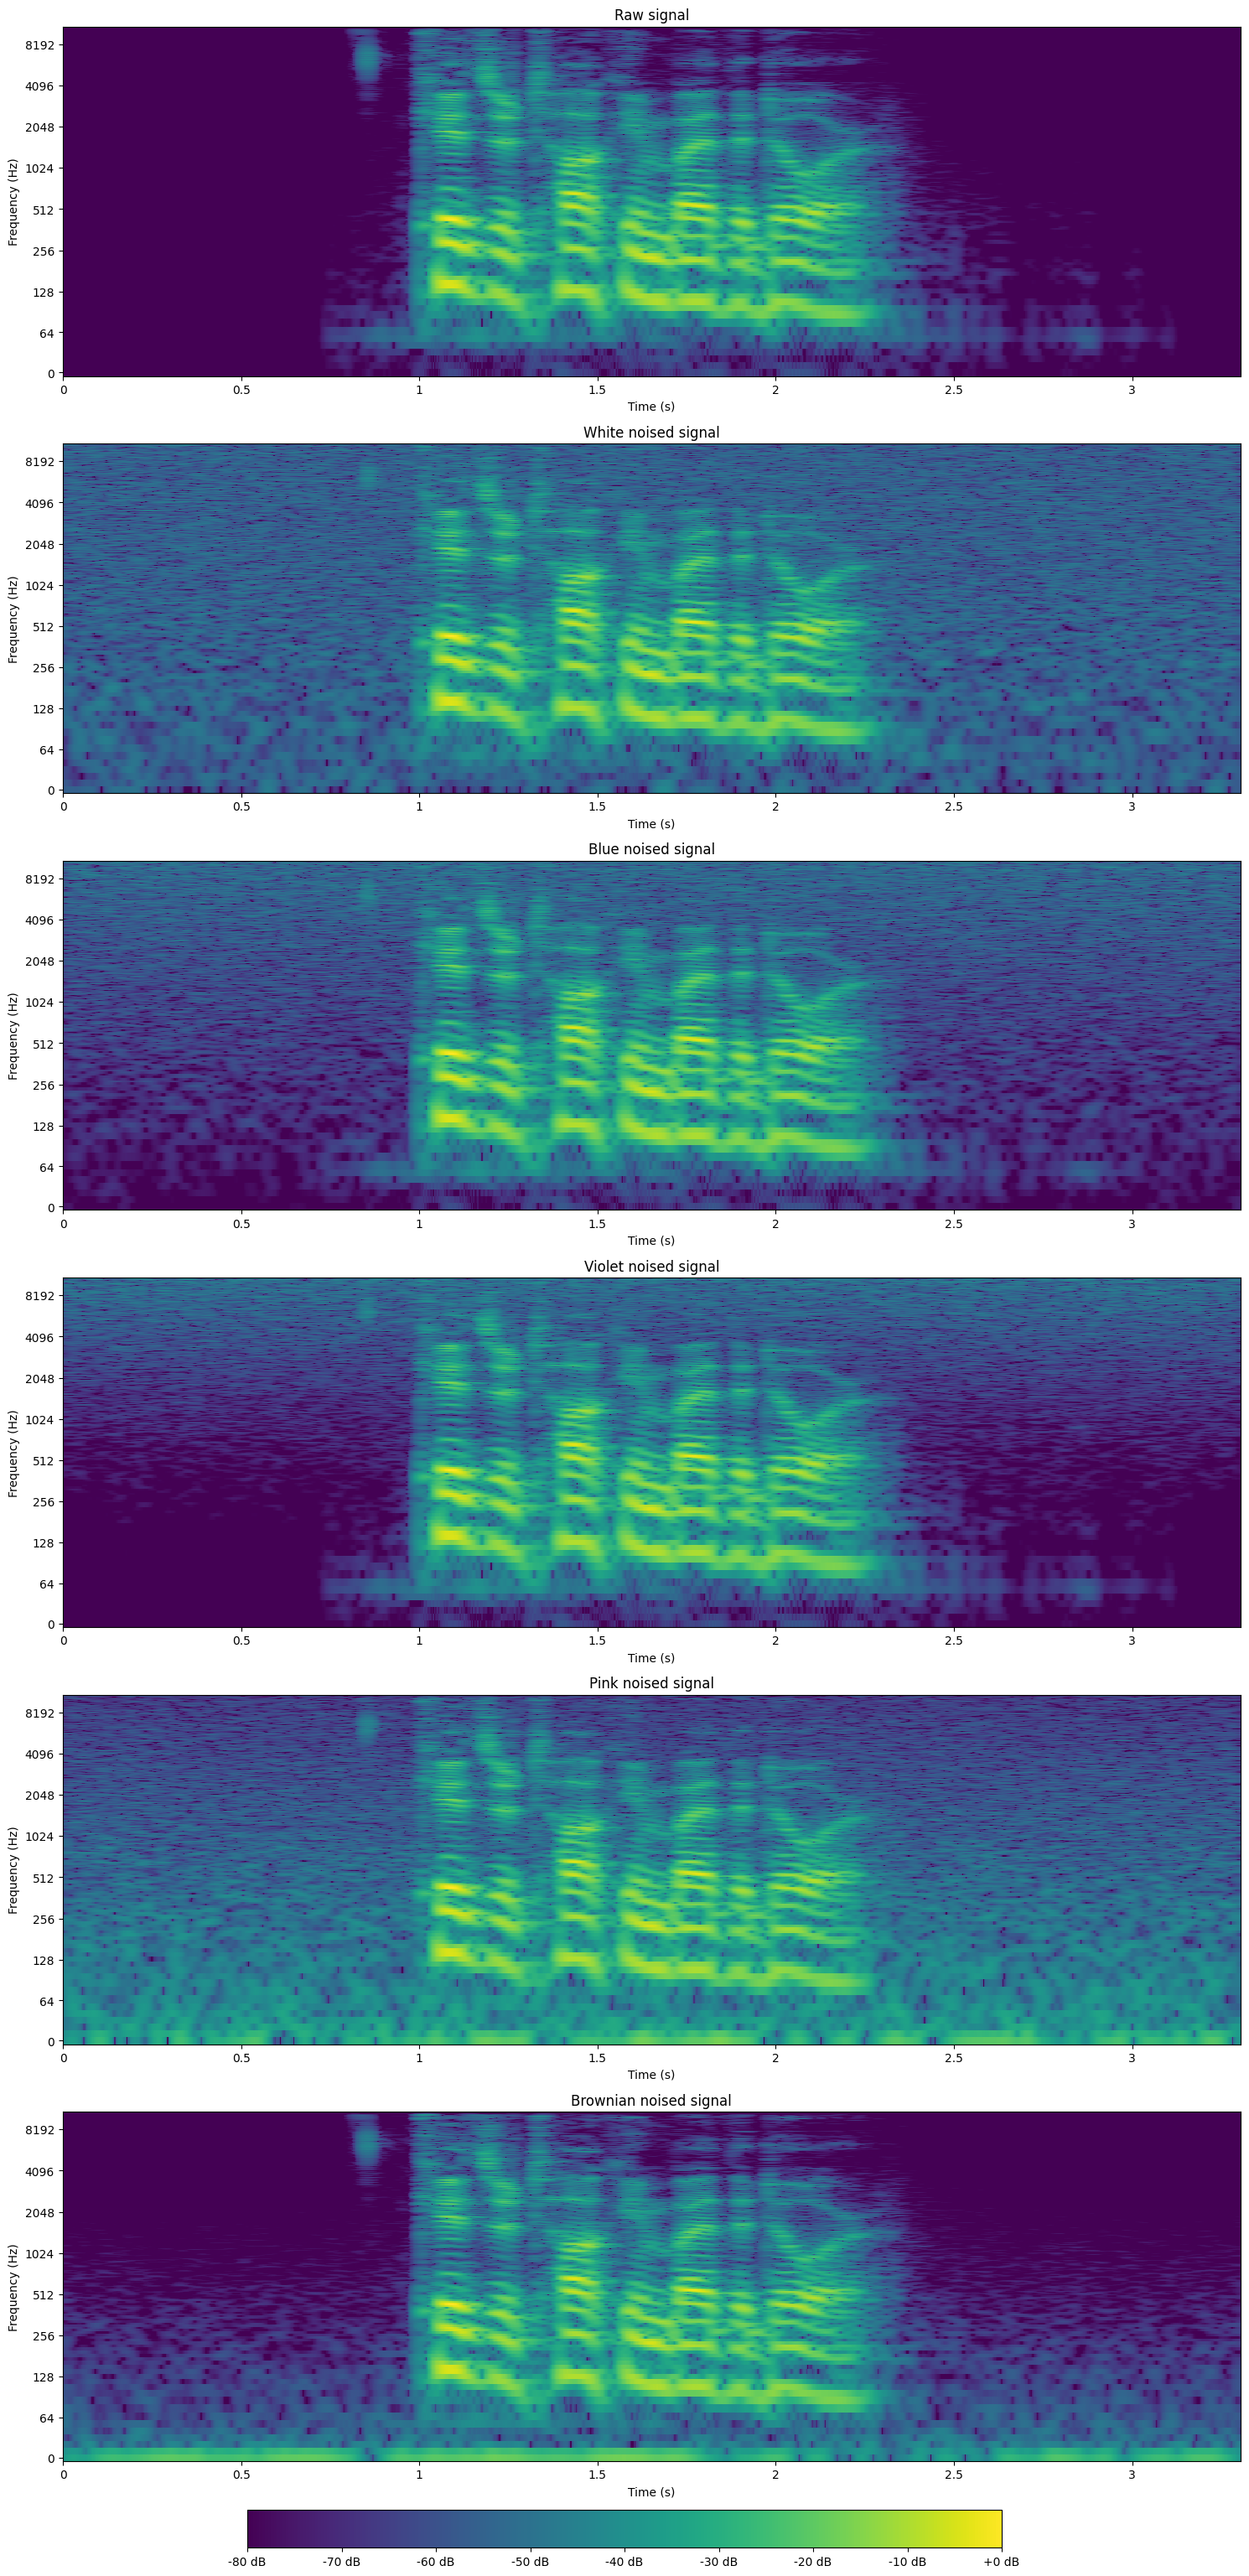

In [7]:
plot_multiple_specs(signals_colors, titles = titles_colors)

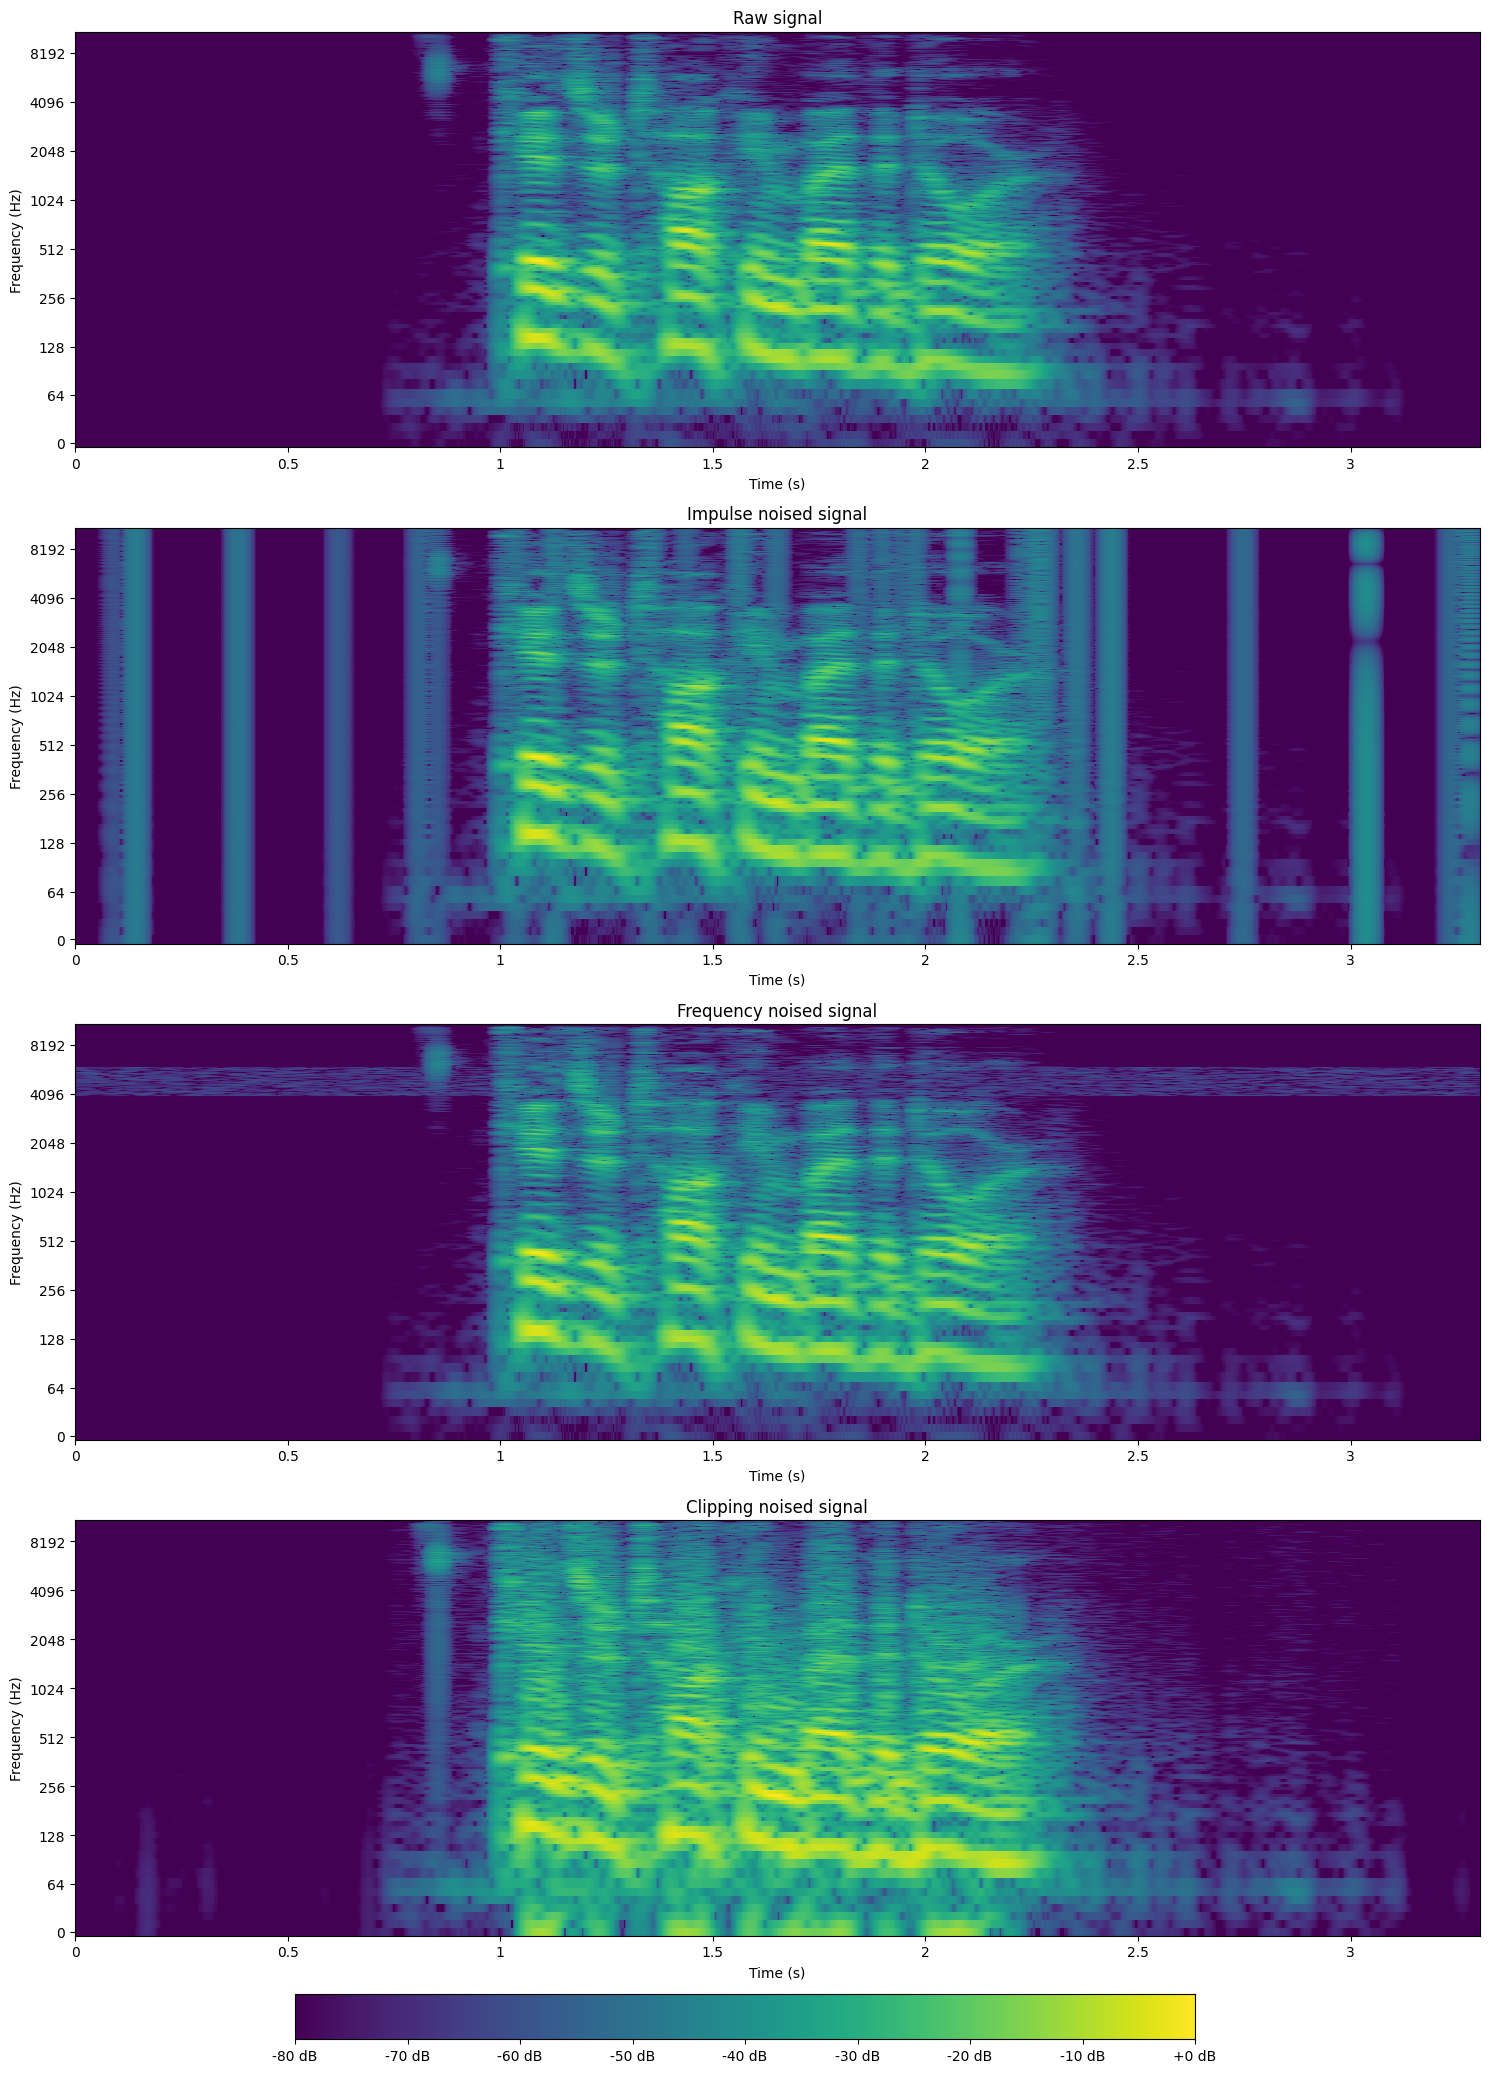

In [8]:
plot_multiple_specs(signals_others, titles = titles_others)